<a href="https://colab.research.google.com/github/edotheepic/ComVis/blob/main/2440007226_ASSIGNMENT_GSLC_02_COMP7116001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Eduardo Brilliandy

NIM : 2440007226

## Import Libraries & Images

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/matchImage1.png
!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/matchImage2.jpg

--2022-11-09 13:34:30--  https://raw.githubusercontent.com/edotheepic/ComVis/main/matchImage1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268121 (262K) [image/png]
Saving to: ‘matchImage1.png’

matchImage1.png     100%[===================>] 261.84K  --.-KB/s    in 0.02s   

2022-11-09 13:34:31 (15.7 MB/s) - ‘matchImage1.png’ saved [268121/268121]

--2022-11-09 13:34:31--  https://raw.githubusercontent.com/edotheepic/ComVis/main/matchImage2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41168 (40K) [image/jpeg]
Saving 

## Read Image

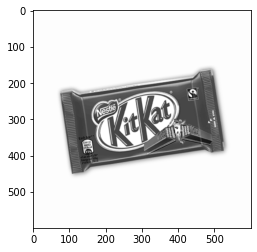

In [2]:
#read first image
img1 = cv.imread('matchImage1.png', 0)

#show grayscale image
plt.imshow(img1, cmap='gray')
plt.show()

### Create SIFT Detector

find keypoints for first image using `sift.detect()`

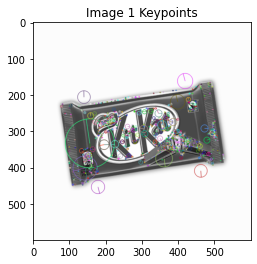

In [4]:
#create sift detector
sift = cv.SIFT_create()

#detect keypoints in image
kp1 = sift.detect(img1, None)

#draw keypoints on image
img_kp1 = cv.drawKeypoints(img1, kp1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_kp1, cmap='gray')
plt.title('Image 1 Keypoints')
plt.show()

find the descriptors for the keypoints using `sift.compute()`

In [5]:
#create descriptors for each keypoints
kp1, desc1 = sift.compute(img1, kp1)

#Show descriptor variables
print(desc1)

[[ 12.   6.   2. ...   0.   0.  26.]
 [ 10.   0.   0. ...   0.   0.  14.]
 [ 11.  64. 154. ...   0.   0.   0.]
 ...
 [  9.  82. 122. ...   3.  18.  33.]
 [  1.   0.   0. ...   0.   0.  10.]
 [ 42.   0.   1. ...   0.   0.  65.]]


do the same thing for the second image. This time `sift.detectAndCompute()` is used to find the keypoints & descriptors at once

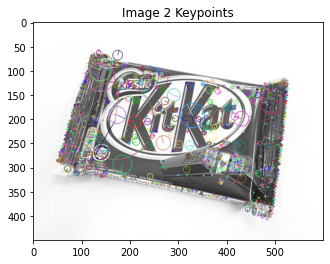

In [6]:
#read second image
img2 = cv.imread('matchImage2.jpg', 0)

#detect keypoint & generate descriptors
kp2, desc2 = sift.detectAndCompute(img2, None)

img_kp2 = cv.drawKeypoints(img2, kp2, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_kp2, cmap='gray')
plt.title('Image 2 Keypoints')
plt.show()

## Apply BFMatcher

Brute-Force matcher matches a descriptor from the first image and compares it with all descriptors from the second image and calculates the distance. The descriptor with the smallest distance is returned.

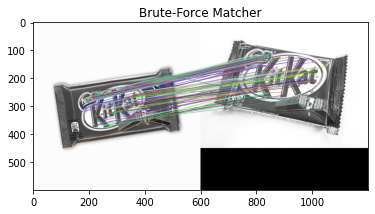

In [8]:
#create Brute Force Matcher
bf = cv.BFMatcher()

#find matches between the two image descriptors
matches = bf.knnMatch(desc1,desc2,k=2)

#ratio test to find good matches
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

#draw good matches on the image
imgBFM = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(imgBFM)
plt.title('Brute-Force Matcher')
plt.show()

## Apply FLANN Based Matcher

FLANN based matcher uses optimized nearest neighbor algorithms so it performs faster compared to BFMatcher.

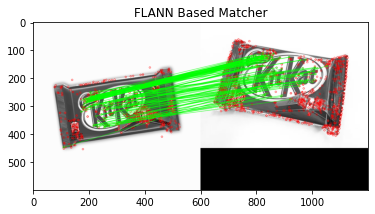

In [9]:
#declare variables needed for FLANN
index_param = dict(algorithm=1)
search_param = dict(checks=50)

#create FLANN
flann = cv.FlannBasedMatcher(index_param, search_param)

#find matches between the two image descriptors
matches = flann.knnMatch(desc1, desc2, k=2)

#create a mask to store only good matches
matchesMask = [[0,0] for i in range(len(matches))]

#ratio test to find good matches
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

#draw good matches
imgFLANN = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(imgFLANN,)
plt.title('FLANN Based Matcher')
plt.show()